In [2]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#### Load the Dataset

In [4]:
data = pd.read_excel('data.xlsx')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source              43 non-null     object 
 1   Destination         43 non-null     object 
 2   Number of  Cycles   43 non-null     int64  
 3   Return_Time         43 non-null     float64
 4   Haul_Time           43 non-null     float64
 5   Spot_Load_Time (s)  43 non-null     float64
 6   Spot_Load_Time      43 non-null     float64
 7   Load_Time           43 non-null     float64
 8   Spot_Dump_Time (s)  43 non-null     float64
 9   Spot_Dump_Time      43 non-null     float64
 10  Dump_Time (s)       43 non-null     float64
 11  Dump_Time           43 non-null     float64
 12  Productive_Cycle    43 non-null     float64
 13  Queue_LoadIn_Time   43 non-null     float64
 14  Queue_DumpIn_Time   43 non-null     float64
 15  Total_Queue_Time    43 non-null     float64
 16  Return_Dis

In [8]:
data.drop(columns=['Number of  Cycles','Spot_Load_Time (s)','Spot_Dump_Time (s)','Dump_Time (s)'], inplace=True)
data.rename(columns={'Source': 'Loading_Area','Destination': 'Dumping_Area'}, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loading_Area        43 non-null     object 
 1   Dumping_Area        43 non-null     object 
 2   Return_Time         43 non-null     float64
 3   Haul_Time           43 non-null     float64
 4   Spot_Load_Time      43 non-null     float64
 5   Load_Time           43 non-null     float64
 6   Spot_Dump_Time      43 non-null     float64
 7   Dump_Time           43 non-null     float64
 8   Productive_Cycle    43 non-null     float64
 9   Queue_LoadIn_Time   43 non-null     float64
 10  Queue_DumpIn_Time   43 non-null     float64
 11  Total_Queue_Time    43 non-null     float64
 12  Return_Distance     43 non-null     float64
 13  Haul_Distance       43 non-null     float64
 14  Total_Distance      43 non-null     float64
 15  Cycle_Time          43 non-null     float64
dtypes: float64

In [79]:
data.isnull().sum()

Loading_Area          0
Dumping_Area          0
Return_Time           0
Haul_Time             0
Spot_Load_Time        0
Load_Time             0
Spot_Dump_Time        0
Dump_Time             0
Productive_Cycle      0
Queue_LoadIn_Time     0
Queue_DumpIn_Time     0
Total_Queue_Time      0
Return_Distance       0
Haul_Distance         0
Total_Distance        0
Cycle_Time            0
dtype: int64

Loading_Area          0
Dumping_Area          0
Return_Time           0
Haul_Time             0
Spot_Load_Time        0
Load_Time             0
Spot_Dump_Time        0
Dump_Time             0
Productive_Cycle      0
Queue_LoadIn_Time     0
Queue_DumpIn_Time     0
Total_Queue_Time      0
Return_Distance       0
Haul_Distance         0
Total_Distance        0
Cycle_Time            0
dtype: int64

#### Describe the Dataset

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Return_Time,43.0,9.389922,4.341558,0.000000,7.050000,8.183333,12.720834,17.158333
Haul_Time,43.0,14.320930,8.488882,0.000000,9.025000,13.400000,21.262500,29.883333
Spot_Load_Time,43.0,0.301744,0.063713,0.000000,0.283333,0.300000,0.329167,0.433333
Load_Time,43.0,4.064341,1.598639,2.416666,2.916667,3.083333,5.275000,8.033333
Spot_Dump_Time,43.0,0.278682,0.138423,0.000000,0.250000,0.283333,0.337500,0.566667
Dump_Time,43.0,1.189341,0.874806,0.616667,0.925000,1.016667,1.075000,5.033333
Productive_Cycle,43.0,30.189535,11.337939,8.291666,23.508333,26.966667,41.633333,51.391666
Queue_LoadIn_Time,43.0,3.481008,2.582630,0.000000,1.270833,3.191667,4.741667,10.500000
Queue_DumpIn_Time,43.0,0.537209,1.045840,0.000000,0.000000,0.000000,0.562500,5.366667
Total_Queue_Time,43.0,4.771124,2.705997,0.391667,2.887500,4.366667,6.016666,11.350000


In [14]:
data['Cycle_Time'].describe()

count    43.000000
mean     36.540698
std      11.170856
min      11.175000
25%      29.700000
50%      34.083333
75%      45.370833
max      57.033333
Name: Cycle_Time, dtype: float64

#### Check Duplicate Data

#### Exploratory Data Analysis(EDA)

##### Univariate Analysis

In [16]:
cat_cols1=data.select_dtypes(include=['object']).columns
num_cols1 = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols1)
print("Numerical Variables:")
print(num_cols1)

Categorical Variables:
Index(['Loading_Area', 'Dumping_Area'], dtype='object')
Numerical Variables:
['Return_Time', 'Haul_Time', 'Spot_Load_Time', 'Load_Time ', 'Spot_Dump_Time', 'Dump_Time', 'Productive_Cycle', 'Queue_LoadIn_Time ', 'Queue_DumpIn_Time ', 'Total_Queue_Time  ', 'Return_Distance', 'Haul_Distance ', 'Total_Distance', 'Cycle_Time']


In [18]:
for i in cat_cols1:
    unique_val = data[i].value_counts()
    print(i)
    print(unique_val)
    print('*'*20)

Loading_Area
Loading_Area
WB 4                  13
WB 5                  12
Unknown                8
WB East Waste Dump     7
ThirtyK Cells          3
Name: count, dtype: int64
********************
Dumping_Area
Dumping_Area
Unknown               5
WB West Waste Dump    4
WB 5                  4
TSF 4/5 East          4
WB East Waste Dump    4
WB 4                  3
ThirtyK Cells         3
PCR Dump              2
SUB GR FR1            2
Crusher               2
B FR4                 2
TSF 4/5 South         2
B FR1                 2
TSF 4/5 West          1
R FR2                 1
B FR5                 1
G FR2                 1
Name: count, dtype: int64
********************


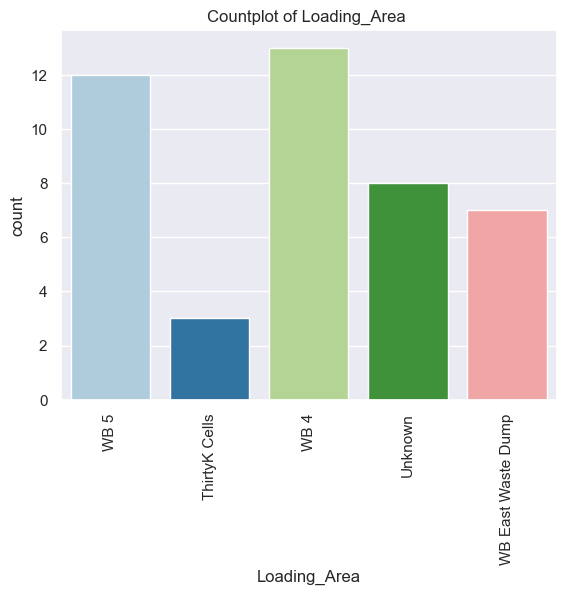

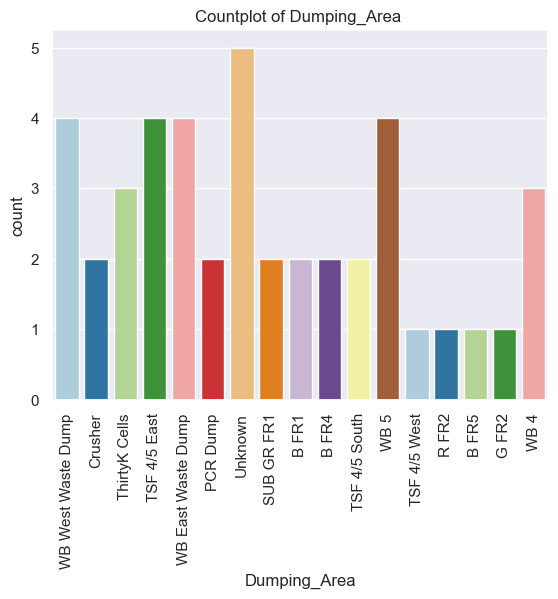

In [20]:
for i in cat_cols1:
    plt.title(f'Countplot of {i} ')
    sns.countplot(x=i, data= data, palette='Paired')
    plt.xticks(rotation=90)
    plt.show()

##### Bivariate Analysis

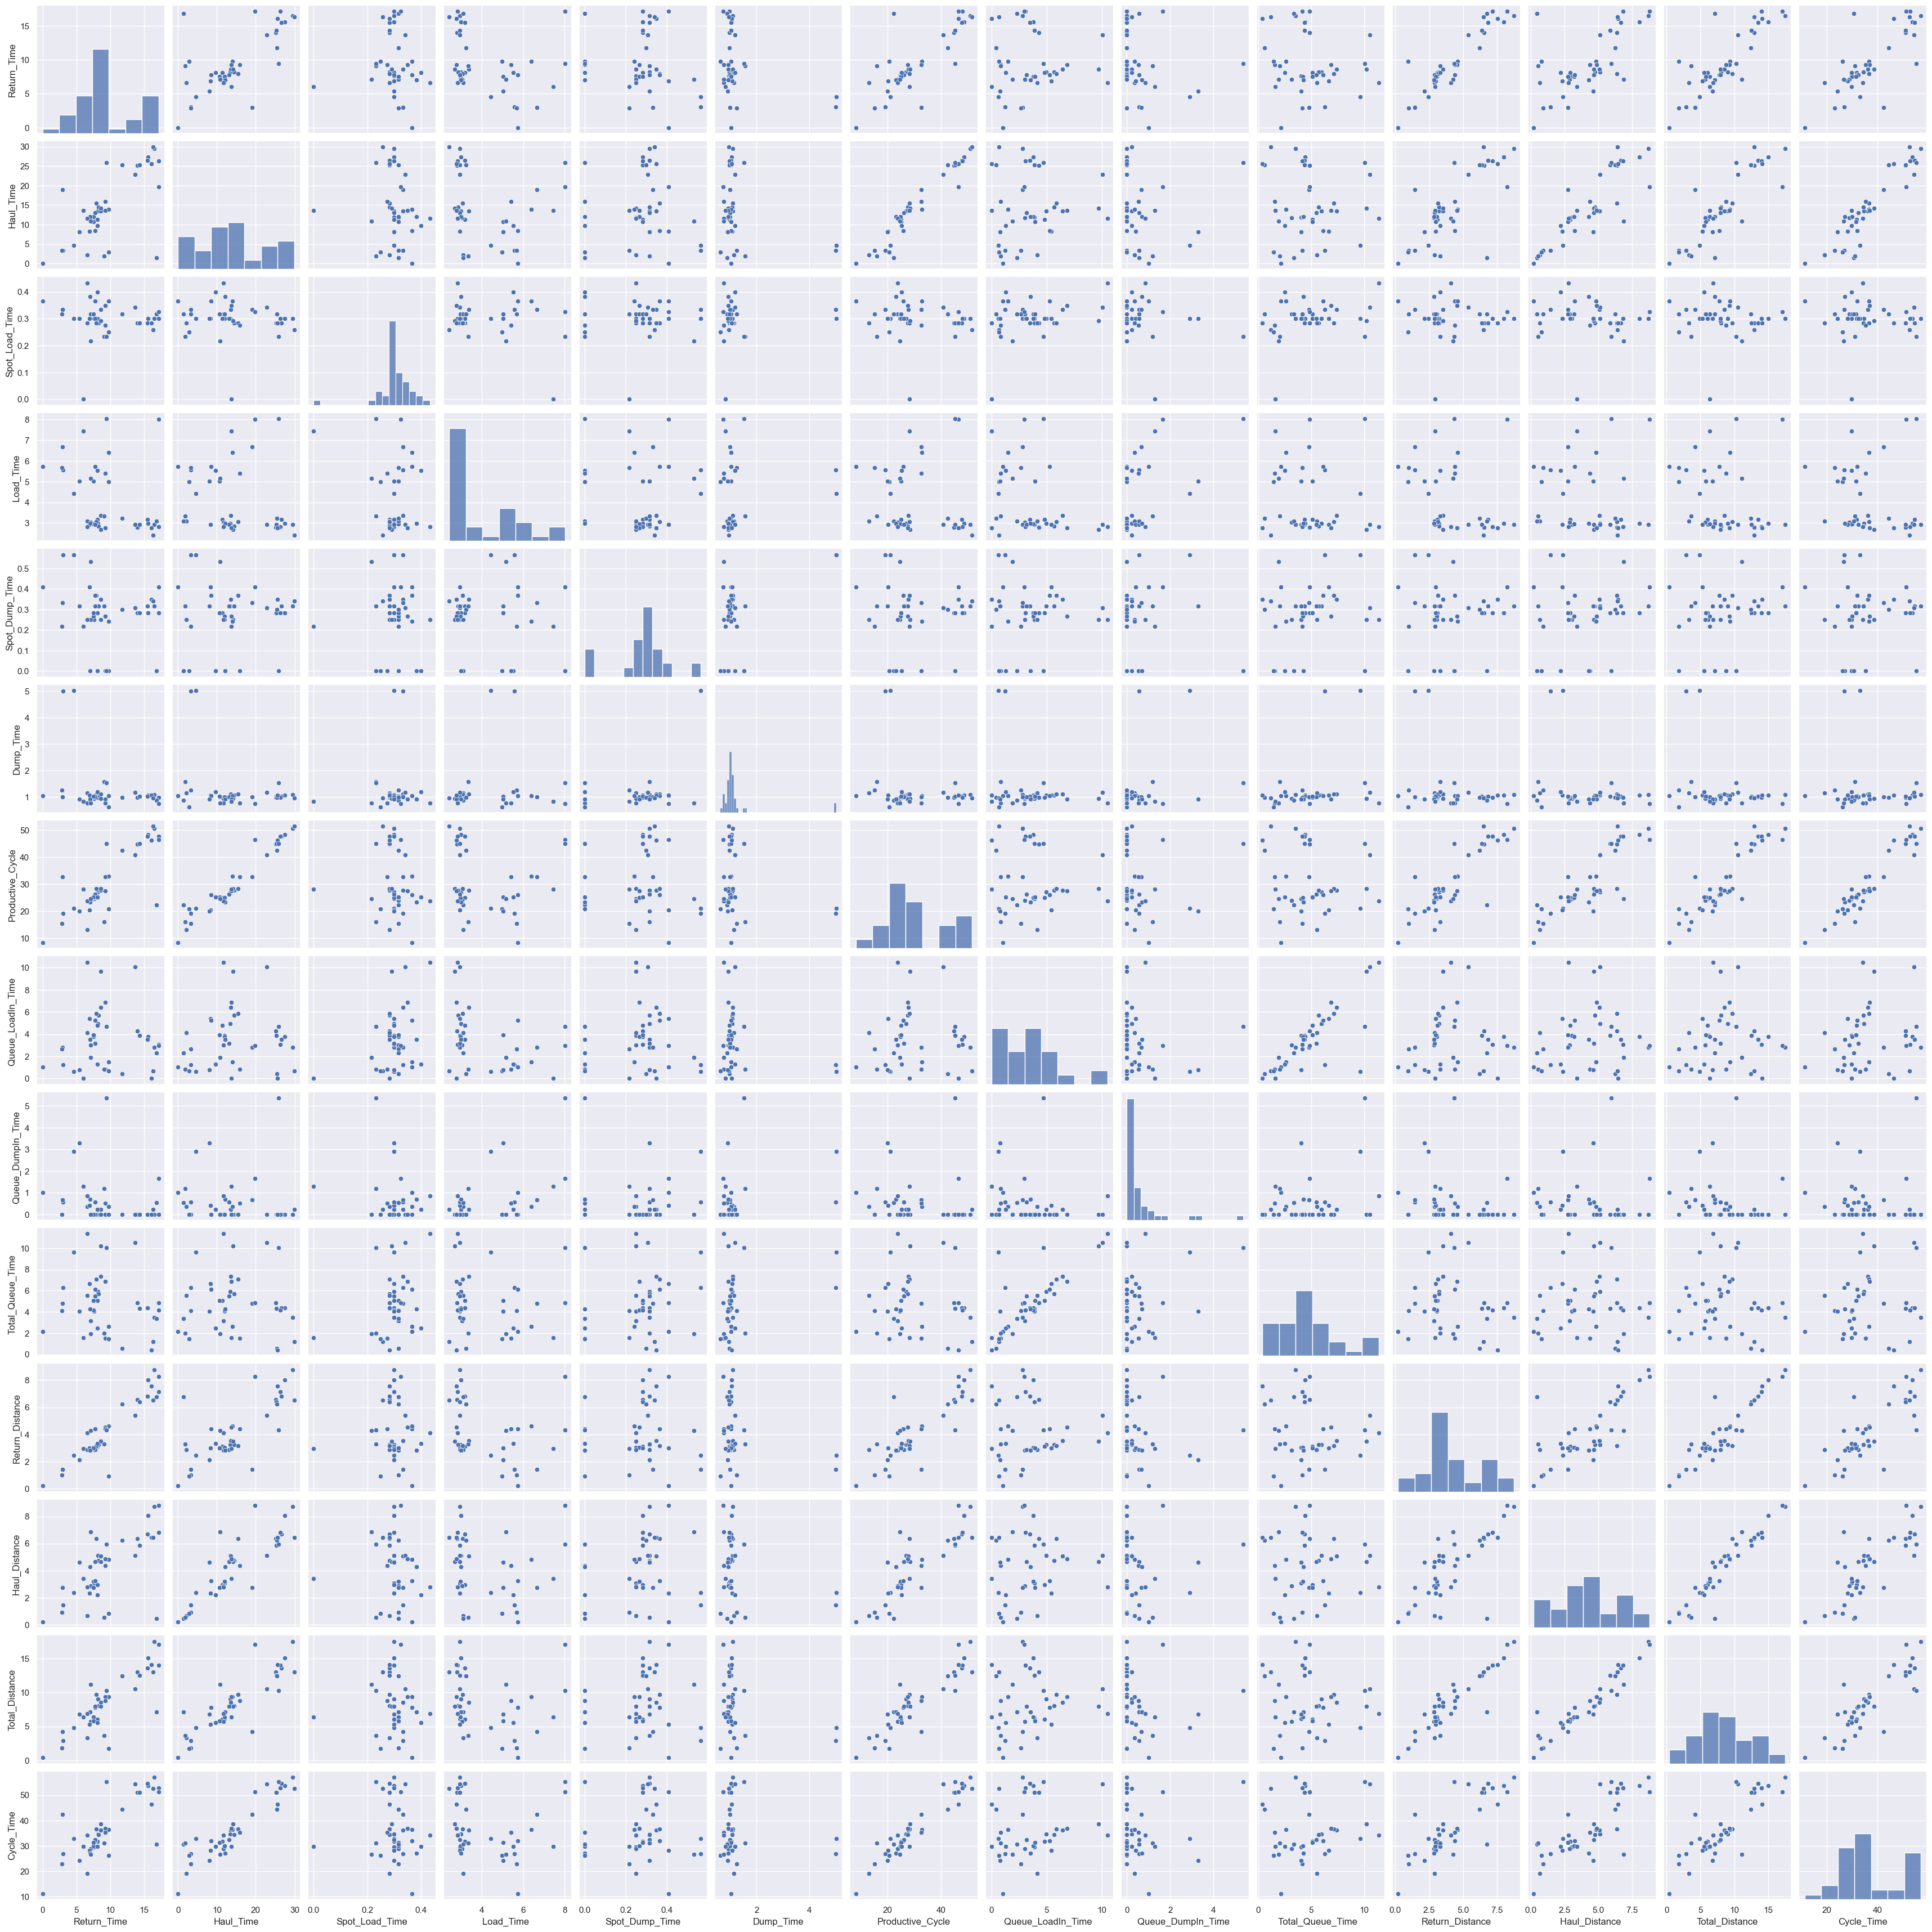

In [22]:
sns.pairplot(data[num_cols1])
plt.show()

In [23]:
corr = data.corr()
plt.figure(figsize=(15,10))

sns.heatmap(data = corr , linecolor='white', linewidths=1, annot=True, cmap = 'viridis')
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

ValueError: could not convert string to float: 'WB 5'

In [87]:
data_df=data[['Loading_Area','Dumping_Area','Return_Time','Haul_Time','Productive_Cycle','Return_Distance','Haul_Distance ','Total_Distance','Cycle_Time']]
data_df.head()

,Loading_Area,Dumping_Area,Return_Time,Haul_Time,Productive_Cycle,Return_Distance,Haul_Distance,Total_Distance,Cycle_Time
0,WB 5,WB West Waste Dump,7.633333,11.900000,24.550000,3.0440,3.0550,6.1525,29.616667
1,ThirtyK Cells,Crusher,3.016667,3.316667,19.133333,1.4330,1.4410,2.8770,26.816667
2,WB 4,ThirtyK Cells,14.033333,25.100000,44.683333,6.5440,6.3680,12.9570,50.983333
3,WB 5,TSF 4/5 East,8.183333,13.400000,26.966667,3.2270,5.1105,9.0615,34.533333
4,WB 4,WB East Waste Dump,14.358334,25.316667,45.066667,6.3965,5.8620,12.4950,51.066667


,Loading_Area,Dumping_Area,Return_Time,Haul_Time,Productive_Cycle,Return_Distance,Haul_Distance,Total_Distance,Cycle_Time
0,WB 5,WB West Waste Dump,7.633333,11.900000,24.550000,3.0440,3.0550,6.1525,29.616667
1,ThirtyK Cells,Crusher,3.016667,3.316667,19.133333,1.4330,1.4410,2.8770,26.816667
2,WB 4,ThirtyK Cells,14.033333,25.100000,44.683333,6.5440,6.3680,12.9570,50.983333
3,WB 5,TSF 4/5 East,8.183333,13.400000,26.966667,3.2270,5.1105,9.0615,34.533333
4,WB 4,WB East Waste Dump,14.358334,25.316667,45.066667,6.3965,5.8620,12.4950,51.066667


In [88]:
cat_cols=data_df.select_dtypes(include=['object']).columns
num_cols = data_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Loading_Area', 'Dumping_Area'], dtype='object')
Numerical Variables:
['Return_Time', 'Haul_Time', 'Productive_Cycle', 'Return_Distance', 'Haul_Distance ', 'Total_Distance', 'Cycle_Time']
Categorical Variables:
Index(['Loading_Area', 'Dumping_Area'], dtype='object')
Numerical Variables:
['Return_Time', 'Haul_Time', 'Productive_Cycle', 'Return_Distance', 'Haul_Distance ', 'Total_Distance', 'Cycle_Time']


Return_Time
Skew : 0.35
Return_Time
Skew : 0.35


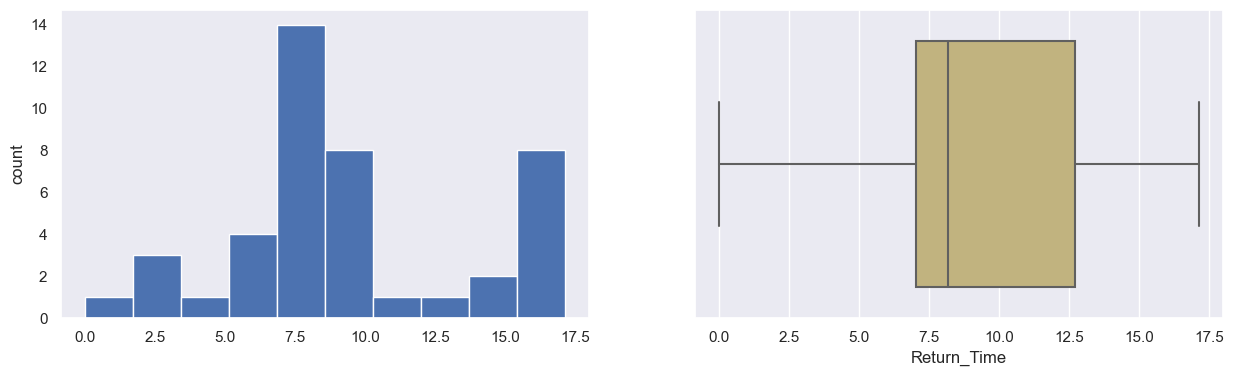

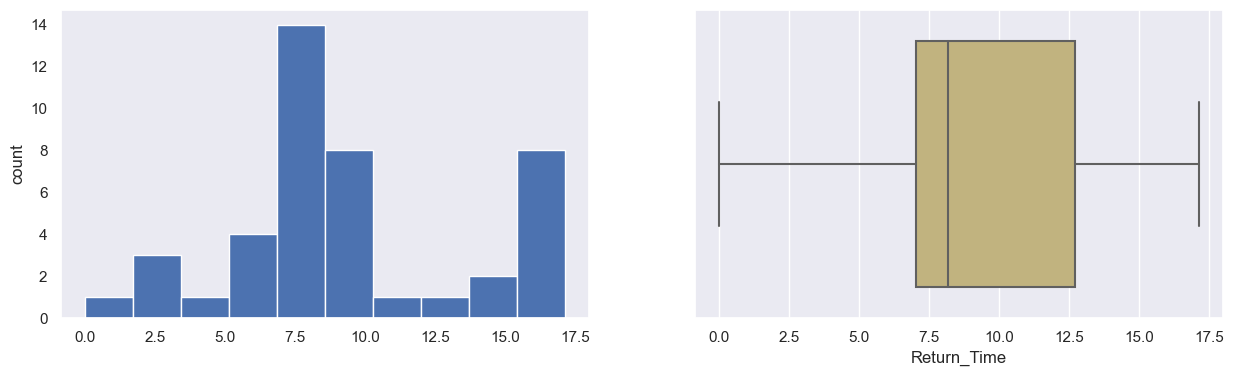

Haul_Time
Skew : 0.24
Haul_Time
Skew : 0.24


In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col],color="y")
    plt.show()

In [ ]:
sns.pairplot(data_df[num_cols])
plt.show()

In [ ]:
corr = data_df.corr()
plt.figure(figsize=(7,4))
sns.heatmap(data = corr , linecolor='white', linewidths=1, annot=True, cmap = 'viridis')
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

In [ ]:
data_df['Road'] = data_df['Loading_Area'] + ' To ' + data_df['Dumping_Area']

In [ ]:
data['Road'] = data['Loading_Area'] + ' To ' + data['Dumping_Area']

In [ ]:
data_df.set_index('Road')[['Return_Distance','Haul_Distance ']].plot(kind='bar',legend=True,figsize=(17,10))
plt.xlabel('Road')
plt.ylabel('Distance (Km)')
plt.title('Haul Distance vs Return Distance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_df.set_index('Road')[['Return_Time','Haul_Time']].plot(kind='bar',legend=True,figsize=(17,10))
plt.xlabel('Road')
plt.ylabel('Time (mn)')
plt.title('Return Vs Haul Time')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_df.set_index('Road')[['Productive_Cycle','Cycle_Time']].plot(kind='bar',legend=True,figsize=(17,10))
plt.xlabel('Road')
plt.ylabel('Time (mn)')
plt.title('Productive Cycle Vs Cycle Time')
plt.xticks(rotation=90)
plt.show()

In [ ]:
num_Load=['Load_Time ','Spot_Load_Time','Queue_LoadIn_Time ']
num_Load

In [ ]:
for i in num_Load:
    result = data.groupby('Loading_Area')[i].mean()
    print(i)
    print(result)
    print('*' * 20)

In [ ]:
for column in num_Load:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Loading_Area', y=column, ci=None)
    plt.xlabel('Loading Area')
    plt.ylabel(column)
    plt.title(f' {column} by Loading Area')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
num_Dump=data[['Dump_Time','Spot_Dump_Time','Queue_DumpIn_Time ']]

In [ ]:
for i in num_Dump:
    result = data.groupby('Dumping_Area')[i].mean()
    print(i)
    print(result)
    print('*' * 20)

In [ ]:
for column in num_Dump:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Dumping_Area', y=column, ci=None)
    plt.xlabel('Dumping Area')
    plt.ylabel(column)
    plt.title(f' {column} by Dumping Area')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
mean_val = data.mean()
mean_val

In [ ]:
# Plotting the mean values as a bar plot
plt.figure(figsize=(10, 6))
mean_val.plot(kind='bar', legend=False)
plt.ylabel('Mean Value')
plt.title('Mean value of the parametrs')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
num_cols2 = data[num_cols1].drop(columns=num_Load).drop(columns=num_Dump)

In [ ]:
# Iterate over the remaining columns in num_cols1
for column in num_cols2:
    # Assuming 'Road' is a valid column in your DataFrame
    data.set_index('Road')[[column]].plot(kind='bar', color='#591e14', legend=True, figsize=(10, 5))
    plt.xlabel('Road')
    plt.ylabel(column)
    plt.title(f'Road vs {column}')
    plt.xticks(rotation=90, fontsize=8)
    plt.show()

In [ ]:
data['Total_Distance(Th)']=data['Return_Distance']+data['Haul_Distance ']

In [ ]:
data.set_index('Road')[['Total_Distance','Total_Distance(Th)']].plot(kind='bar',legend=True,figsize=(17,10))
plt.xlabel('Road')
plt.ylabel('Distance (Km)')
plt.title('Total distance variation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data['Total_Queue_Time(Th)']=data['Queue_LoadIn_Time ']+data['Queue_DumpIn_Time ']
data['Total_Queue_Time  ']

In [ ]:
data.set_index('Road')[['Total_Queue_Time(Th)','Total_Queue_Time  ']].plot(kind='bar',legend=True,figsize=(17,10))
plt.xlabel('Road')
plt.ylabel('Time (mn)')
plt.title('Queue Time variation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data['Productive_Cycle(th)']=data['Return_Time']+data['Haul_Time']+data['Load_Time ']+data['Dump_Time']+data['Spot_Load_Time']+data['Spot_Dump_Time']

In [ ]:
data.set_index('Road')[['Productive_Cycle(th)','Productive_Cycle']].plot(kind='bar',legend=True,figsize=(17,10))
plt.xlabel('Road')
plt.ylabel('Time (mn)')
plt.title('Productive cycle variation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data['Cycle_Time(Th)']=data['Productive_Cycle(th)']+data['Total_Queue_Time(Th)']

In [ ]:
data.set_index('Road')[['Cycle_Time(Th)','Cycle_Time']].plot(kind='bar',legend=True,figsize=(17,10))
plt.xlabel('Road')
plt.ylabel('Time (mn)')
plt.title('Productive cycle variation')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data['Diff(Cycle_Time)']=data['Cycle_Time']-data['Cycle_Time(Th)']

In [ ]:
data.set_index('Road')['Diff(Cycle_Time)'].plot(kind='bar', color='#2e798c', legend=True, figsize=(10, 5))
plt.xlabel('Road')
plt.ylabel(column)
plt.title(f'Road vs {column}')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [ ]:
data_df=data_df.drop(columns='Total_Distance')

In [ ]:
data_df['Road']= 'From '+ data['Road']

In [ ]:
data_df.head()

In [ ]:
cat_col=data_df.select_dtypes(include=['object']).columns
num_col = data_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_col)
print("Numerical Variables:")
print(num_col)

In [ ]:
data_df=data_df.drop(columns=cat_col)

In [ ]:
data_df.head()

In [ ]:
data_df.shape

In [ ]:
x = data_df.drop('Cycle_Time',axis=1)
y = data_df['Cycle_Time']

In [ ]:
cat=data.select_dtypes(include=['object']).columns
num = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_col)
print("Numerical Variables:")
print(num_col)

In [ ]:
# Assuming 'data' is your DataFrame, and you want to drop multiple columns
columns_to_drop = ['Total_Distance', 'Total_Queue_Time  ', 'Total_Distance(Th)', 'Productive_Cycle(th)', 'Total_Queue_Time(Th)', 'Productive_Cycle(th)', 'Cycle_Time(Th)', 'Diff(Cycle_Time)']

data = data.drop(columns=columns_to_drop)

In [ ]:
data=data.drop(columns=cat)

In [ ]:
data.info()

In [ ]:
x = data_df.drop('Cycle_Time',axis=1)
y = data_df['Cycle_Time']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=5, random_state=42)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

### Model Building

#### Model.1: Linear Regression

In [ ]:
# Create a linear regression model
linear_model = LinearRegression()



# Fit the model to your training data
linear_model.fit(x_train, y_train)

# Make predictions
y_pred_LM = linear_model.predict(x_test)

In [ ]:
# Assuming you have true labels (y_test) and predicted labels (y_pred)
mse = mean_squared_error(y_test, y_pred_LM)

print("Mean Squared Error:", mse)



# Assuming you have true labels (y_test) and predicted labels (y_pred)
r_squared = r2_score(y_test, y_pred_LM)

print("R-squared:", r_squared)



# Assuming you have true labels (y_true) and predicted labels (y_pred)
mae = mean_absolute_error(y_test, y_pred_LM)

print("Mean Absolute Error:", mae)

#### Model 2: Decision Tree Regressor

In [ ]:
# Create a decision tree regressor
tree_model = DecisionTreeRegressor()

# Fit the model to your training data
tree_model.fit(x_train, y_train)

# Make predictions
y_pred_TM = tree_model.predict(x_test)

In [ ]:
# Assuming you have true labels (y_test) and predicted labels (y_pred)
mse1 = mean_squared_error(y_test, y_pred_TM)

print("Mean Squared Error:", mse1)

r_squared1 = r2_score(y_test, y_pred_TM)

print("R-squared:", r_squared1)

# Assuming you have true labels (y_true) and predicted labels (y_pred)
mae1 = mean_absolute_error(y_test, y_pred_TM)

print("Mean Absolute Error:", mae1)

#### Model 3: Random Forest Regressor

In [ ]:
# Create a random forest regressor
forest_model = RandomForestRegressor()

# Fit the model to your training data
forest_model.fit(x_train, y_train)

# Make predictions
y_pred_FM = forest_model.predict(x_test)

In [ ]:
# Assuming you have true labels (y_test) and predicted labels (y_pred)
mse2 = mean_squared_error(y_test, y_pred_FM)

print("Mean Squared Error:", mse2)

r_squared2 = r2_score(y_test, y_pred_FM)

print("R-squared:", r_squared2)

# Assuming you have true labels (y_true) and predicted labels (y_pred)
mae2 = mean_absolute_error(y_test, y_pred_FM)

print("Mean Absolute Error:", mae2)

#### Model 4: Support Vector Regressor (SVR)

In [ ]:
# Create a support vector regressor
svr_model = SVR()

# Fit the model to your training data
svr_model.fit(x_train, y_train)

# Make predictions
y_pred_SVR= svr_model.predict(x_test)

In [ ]:
# Assuming you have true labels (y_test) and predicted labels (y_pred)
mse3 = mean_squared_error(y_test, y_pred_SVR)

print("Mean Squared Error:", mse3)

r_squared3 = r2_score(y_test, y_pred_SVR)

print("R-squared:", r_squared3)

# Assuming you have true labels (y_true) and predicted labels (y_pred)
mae3 = mean_absolute_error(y_test, y_pred_SVR)

print("Mean Absolute Error:", mae3)

#### Model 5 : Gradient Boosting Regressor

In [ ]:
# Create a gradient boosting regressor
gradient_boosting_model = GradientBoostingRegressor()

# Fit the model to your training data
gradient_boosting_model.fit(x_train, y_train)

# Make predictions
y_pred_GBM = gradient_boosting_model.predict(x_test)

In [ ]:
# Assuming you have true labels (y_test) and predicted labels (y_pred)
mse4 = mean_squared_error(y_test, y_pred_GBM)

print("Mean Squared Error:", mse4)

r_squared4 = r2_score(y_test, y_pred_GBM)

print("R-squared:", r_squared4)

# Assuming you have true labels (y_true) and predicted labels (y_pred)
mae4 = mean_absolute_error(y_test, y_pred_GBM)

print("Mean Absolute Error:", mae4)

In [ ]:
model_names = ['linear_model', 'tree_model', 'forest_model', 'svr_model', 'gradient_boosting_model']
mse_values = [mse, mse1, mse2, mse3, mse4]
r2_values = [r_squared,r_squared1,r_squared2,r_squared2,r_squared4]
mae_values = [mae, mae1, mae2, mae3, mae4]

# Create a DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'MAE': mae_values,
    'R2': r2_values,
})
# Display the table
print(results_df)

In [ ]:
results_df.sort_values(by='R2',ascending=False)

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x = results_df['Model'], y = results_df['R2'])
plt.title('Comparison of Models by Cofficient of determination')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x = results_df['Model'], y = results_df['MSE'])
plt.title('Comparison of Models by Mean Squared Error ')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x = results_df['Model'], y = results_df['MAE'])
plt.title('Comparison of Models by Mean Absoluate Error ')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Distribution of the target variable (Sales)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['Cycle_Time'], bins=30, kde=True, color='purple')
plt.title('Distribution of Cycle Time')
plt.xlabel('Cycle Time')
plt.ylabel('Frequency')